In [10]:
import os
import json
import chainer
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [37]:
def list2ndarray(l):
    result = []
    for d in l:
        epoch = d["epoch"]
        acc = d["main/accuracy"]
        val_acc = d["validation/main/accuracy"]
        loss = d["main/loss"]
        val_loss = d["validation/main/loss"]
        result.append([epoch, loss, val_loss, acc, val_acc])
    return np.array(result)

In [2]:
BASE_DIR = "./log"

In [3]:
log_files = glob(os.path.join(BASE_DIR, "*/log"))

In [38]:
result = {}

for path in log_files:

    with open(path, "r") as f:
        l = json.load(f)

    opt_str = path.split("/")[-2]

    tmp = list2ndarray(l)

    result.update({opt_str: tmp})

In [44]:
l

[{'elapsed_time': 217.109917116999,
  'epoch': 1,
  'iteration': 391,
  'main/accuracy': 0.18168558180332184,
  'main/loss': 2.4649837017059326,
  'validation/main/accuracy': 0.2350672483444214,
  'validation/main/loss': 2.0990381240844727},
 {'elapsed_time': 434.33019641699866,
  'epoch': 2,
  'iteration': 782,
  'main/accuracy': 0.241628035902977,
  'main/loss': 1.9273635149002075,
  'validation/main/accuracy': 0.17751187086105347,
  'validation/main/loss': 2.4889492988586426}]

In [41]:
result[key]

array([[1.        , 2.4649837 , 2.09903812, 0.18168558, 0.23506725],
       [2.        , 1.92736351, 2.4889493 , 0.24162804, 0.17751187]])

loss plot


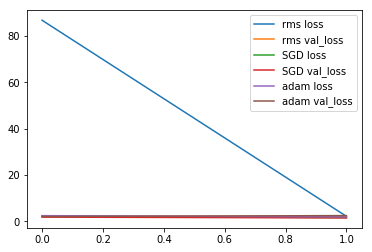

acc plot


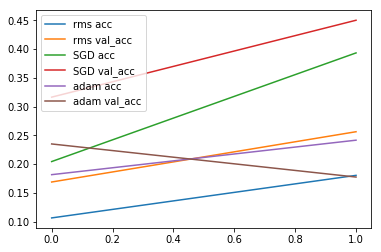

In [47]:
legend = []
print("loss plot")
for key in result.keys():
    data = result[key]
    plt.plot(data[:, 1])
    plt.plot(data[:, 2])
    legend.extend(["{0} loss".format(key), "{0} val_loss".format(key)])
plt.legend(legend)
plt.show()
plt.close()

legend = []
print("acc plot")
for key in result.keys():
    data = result[key]
    plt.plot(data[:, 3])
    plt.plot(data[:, 4])
    legend.extend(["{0} acc".format(key), "{0} val_acc".format(key)])
plt.legend(legend)
plt.show()
plt.close()